In [43]:
%reload_ext autoreload
%autoreload 2
import os
import sys
import function as func
from ellipsoid_mirror import *
from read_simulation import *
np.set_printoptions(threshold=20)

plt.rcParams['font.size'] = 18
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

indir = 'input/CST/CorrugatedHornAntenna_v1-1'
outdir = 'output/CorrugatedHornAntenna_v1-1'
if not os.path.isdir(outdir):
    os.mkdir(outdir)
    pass

## Farfield beam pattern

In [128]:
freq_list = [170, 180, 210, 215, 220, 260]
phi_list = [0, 45, 90] # E-plane: phi=90 / H-plane: phi=0
pol_list = ["Copol", "Crosspol"]
color_dict = {
    ('Copol', 90): 'black',
    ('Copol', 0): 'magenta',
    ('Copol', 45): 'lime',
    ('Crosspol', 90): 'gray',
    ('Crosspol', 0): 'brown',
    ('Crosspol', 45): 'blue',
}

data_list = []
for _freq in freq_list:
    for _phi in phi_list:
        for _pol in pol_list:
            _filename = f'{indir}/Farfield{_freq:.0f}GHz{_pol}phi{_phi:.0f}.txt'
            _label = f'{_freq:.0f} GHz {_pol} phi={_phi:.0f} deg'
            
            _data = read_CST(_filename, datatype='1D', verbose=0)
            _data['y'] = func.ratio_to_dB( _data['y'] ) # ratio --> dB
            
            _data['filename'] = _filename
            _data['label'] = _label
            _data['freq'] = _freq
            _data['phi'] = _phi
            _data['pol'] = _pol
            # color
            _data['color'] = color_dict[(_pol, _phi)]
            
            data_list.append( _data )
            pass
        pass
    pass

input file = input/CST/CorrugatedHornAntenna_v1-1/Farfield170GHzCopolphi0.txt (type=1D)
input file = input/CST/CorrugatedHornAntenna_v1-1/Farfield170GHzCrosspolphi0.txt (type=1D)
input file = input/CST/CorrugatedHornAntenna_v1-1/Farfield170GHzCopolphi45.txt (type=1D)
input file = input/CST/CorrugatedHornAntenna_v1-1/Farfield170GHzCrosspolphi45.txt (type=1D)
input file = input/CST/CorrugatedHornAntenna_v1-1/Farfield170GHzCopolphi90.txt (type=1D)
input file = input/CST/CorrugatedHornAntenna_v1-1/Farfield170GHzCrosspolphi90.txt (type=1D)
input file = input/CST/CorrugatedHornAntenna_v1-1/Farfield180GHzCopolphi0.txt (type=1D)
input file = input/CST/CorrugatedHornAntenna_v1-1/Farfield180GHzCrosspolphi0.txt (type=1D)
input file = input/CST/CorrugatedHornAntenna_v1-1/Farfield180GHzCopolphi45.txt (type=1D)
input file = input/CST/CorrugatedHornAntenna_v1-1/Farfield180GHzCrosspolphi45.txt (type=1D)
input file = input/CST/CorrugatedHornAntenna_v1-1/Farfield180GHzCopolphi90.txt (type=1D)
input file

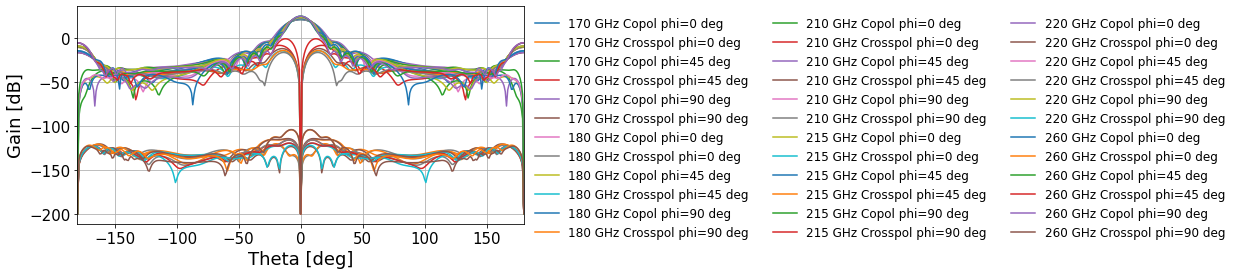

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for _data in data_list:
    ax.plot(_data['x'], _data['y'], label=_data['label'])
    ax.grid(True)
    ax.set_xlabel('Theta [deg]')
    ax.set_ylabel('Gain [dB]')
    ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, ncol=3)
    ax.set_xlim([-180, 180])
    pass

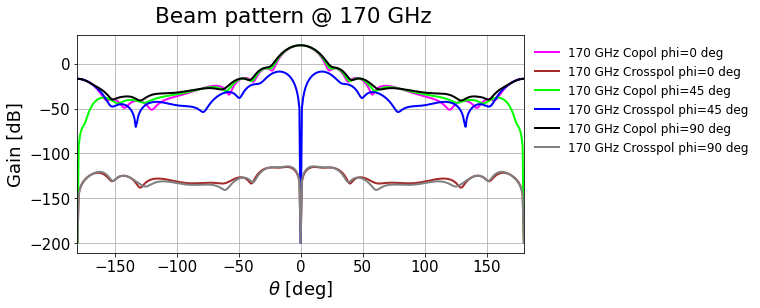

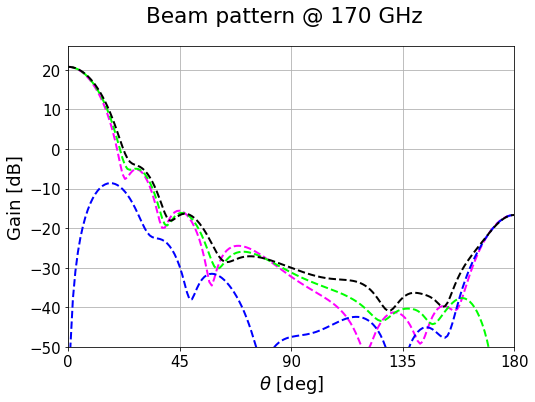

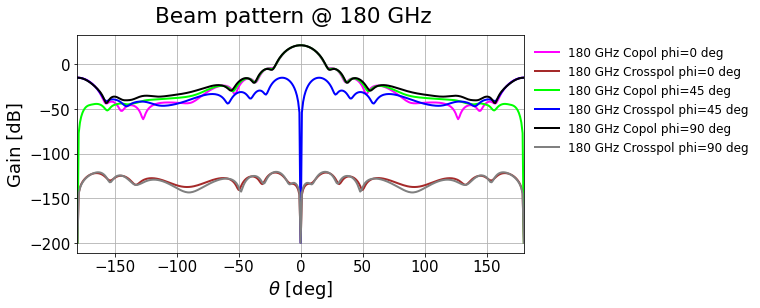

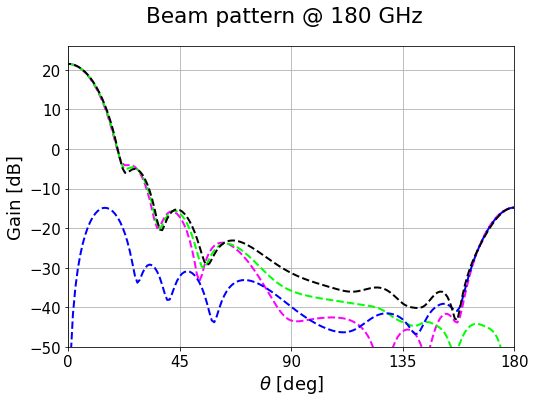

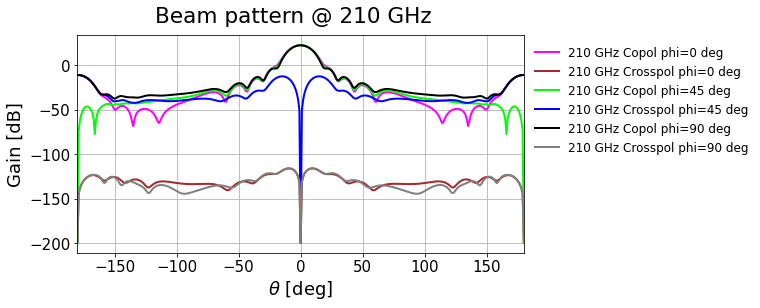

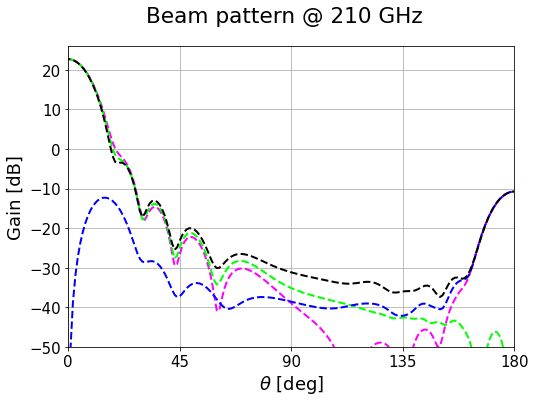

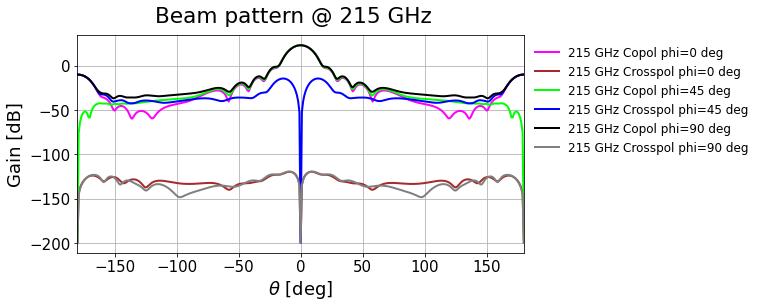

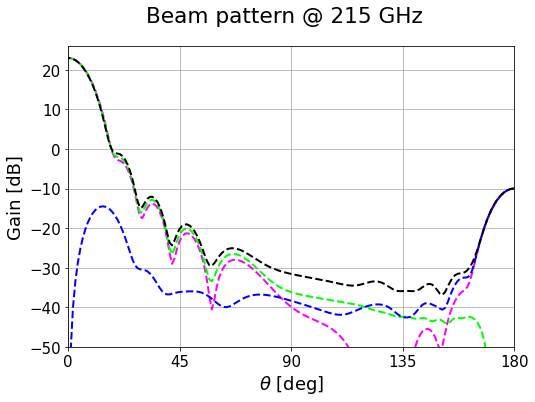

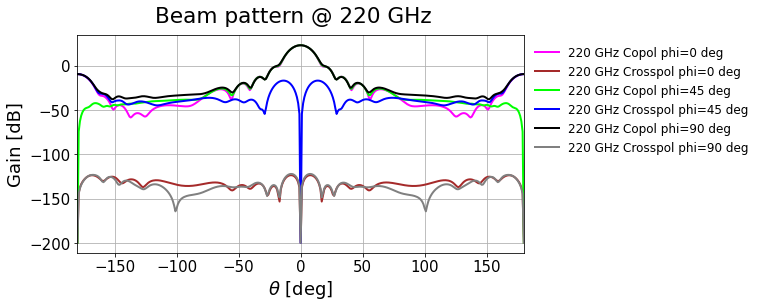

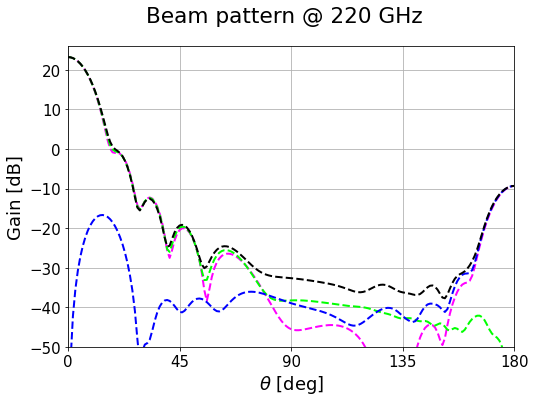

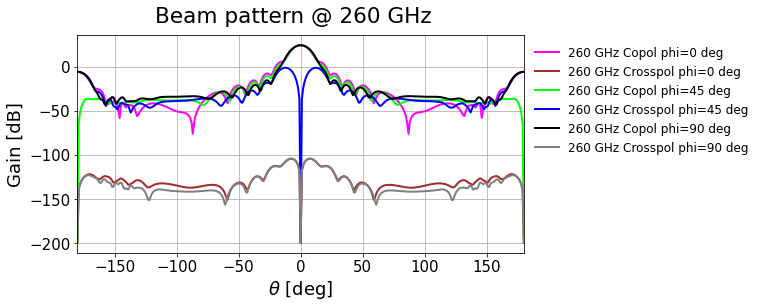

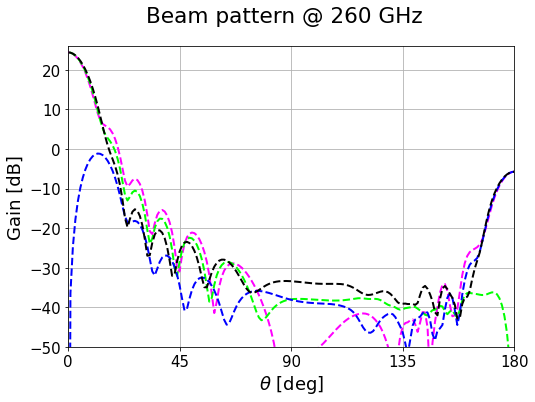

In [147]:
def plotFarfield1D(data_list = data_list, freq=None, xlim=None, ylim=None, xticks=None, figsize=(8, 4), ls='-', ncol=1, legend=True, save=False):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for _data in data_list:
        title = 'Beam pattern'
        if freq is not None:
            title = f'Beam pattern @ {freq:.0f} GHz'
            if _data['freq'] != freq:
                #print(f'skip! freq = {_data["freq"]}')
                continue
                pass
            pass
        fig.suptitle(title)
        ax.plot(_data['x'], _data['y'], label=_data['label'], c=_data['color'], ls=ls, lw=2)
        ax.grid(True)
        ax.set_xlabel(r'$\theta$ [deg]')
        ax.set_ylabel('Gain [dB]')
        if legend: ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, ncol=ncol)
        if xlim is not None: ax.set_xlim(xlim)
        if ylim is not None: ax.set_ylim(ylim)
        if xticks is not None: ax.set_xticks(xticks)
        pass
    if save: 
        _outname = 'Beampattern' if freq is None else f'Beampattern_{freq:.0f}GHz'
        fig.savefig(f'{outdir}/{_outname}.png', transparent=True)
        pass
    return 0

for _freq in freq_list:
    plotFarfield1D(data_list, freq=_freq, xlim=[-180, 180], ncol=1)
    plotFarfield1D(data_list, freq=_freq, xlim=[0, 180], ylim=[-50, 26], xticks=np.linspace(0, 180, 5), figsize=(8, 5.53), 
                   ls='--', legend=False, save=True) # for overlapping with Iwata-san Master Thesis
    pass

## S11

In [37]:
fileS11_list = [f'{indir}/S11.txt']
labelS11_list = ['S11']

dataS11_list = []
for i, _filename in enumerate(fileS11_list):
    _label = labelS11_list[i]
            
    _data = read_CST(_filename, datatype='1D', verbose=0)
    _data['filename'] = _filename
    _data['label'] = _label
            
    dataS11_list.append( _data )
    pass

input file = input/CST/CorrugatedHornAntenna_v1-1/S11.txt (type=1D)


0

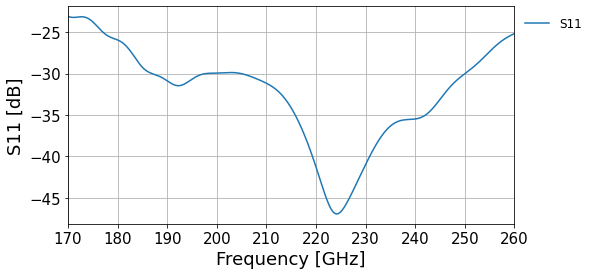

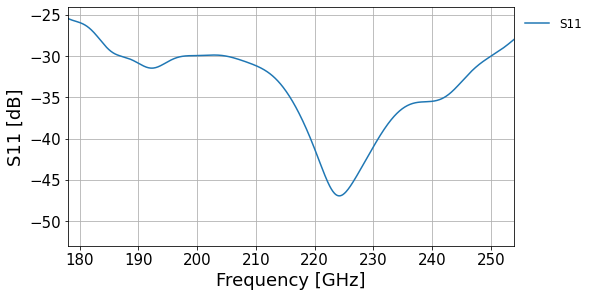

In [62]:
def plotS11(data_list = dataS11_list, xlim=None, ylim=None, figsize=(8, 4), save=False):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for _data in data_list:
        ax.plot(_data['x'], _data['y'], label=_data['label'])
        ax.grid(True)
        ax.set_xlabel('Frequency [GHz]')
        ax.set_ylabel('S11 [dB]')
        ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, ncol=1)
        if xlim is not None: ax.set_xlim(xlim)
        if ylim is not None: ax.set_ylim(ylim)
        pass
    if save: fig.savefig(f'{outdir}/S11.png', transparent=True)
    return 0

plotS11(dataS11_list, xlim=[170, 260]) # for all frequency
plotS11(dataS11_list, xlim=[178, 254], ylim=[-53, -24], figsize=(8, 4.4)) # for overlapping with Iwata-san Master Thesis

## HWHM

In [70]:
fileHWHM_list = [
    f'{indir}/FWHM_phi0.txt',
    f'{indir}/FWHM_phi45.txt',
    f'{indir}/FWHM_phi90.txt',
]
labelHWHM_list = [
    '$\phi=0$ deg H-plane',
    '$\phi=45$ deg',
    '$\phi=90$ deg E-plane',
]
colorHWHM_list = [
    'lime',
    'red',
    'black'
]

dataHWHM_list = []
for i, _filename in enumerate(fileHWHM_list):
    _label = labelHWHM_list[i]
    _color = colorHWHM_list[i]
            
    _data = read_CST(_filename, datatype='1D', verbose=0)
    _data['y'] = _data['y']/2. # FWHM --> HWHM
    _data['filename'] = _filename
    _data['label'] = _label
    _data['color'] = _color
            
    dataHWHM_list.append( _data )
    pass

input file = input/CST/CorrugatedHornAntenna_v1-1/FWHM_phi0.txt (type=1D)
input file = input/CST/CorrugatedHornAntenna_v1-1/FWHM_phi45.txt (type=1D)
input file = input/CST/CorrugatedHornAntenna_v1-1/FWHM_phi90.txt (type=1D)


0

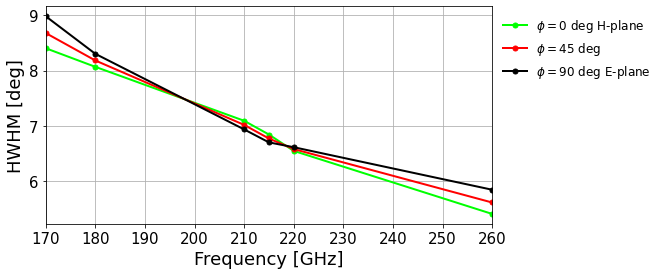

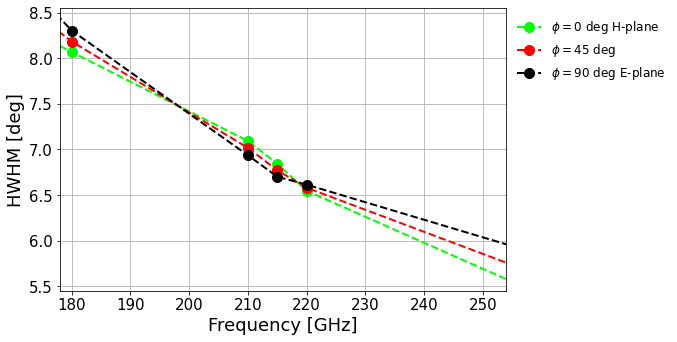

In [79]:
def plotHWHM(data_list = dataHWHM_list, xlim=None, ylim=None, figsize=(8, 4), ls='-', markersize=5, save=False):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for _data in data_list:
        ax.plot(_data['x'], _data['y'], label=_data['label'], c=_data['color'], marker='o', markersize=markersize, ls=ls, lw=2)
        ax.grid(True)
        ax.set_xlabel('Frequency [GHz]')
        ax.set_ylabel('HWHM [deg]')
        ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, ncol=1)
        if xlim is not None: ax.set_xlim(xlim)
        if ylim is not None: ax.set_ylim(ylim)
        pass
    if save: fig.savefig(f'{outdir}/HWHM.png', transparent=True)
    return 0

plotHWHM(dataHWHM_list, xlim=[170, 260]) # for all frequency
plotHWHM(dataHWHM_list, xlim=[178, 254], ylim=[5.45, 8.55], figsize=(8, 5.2), 
         markersize=10, ls='--', save=True) # for overlapping with Iwata-san Master Thesis

0

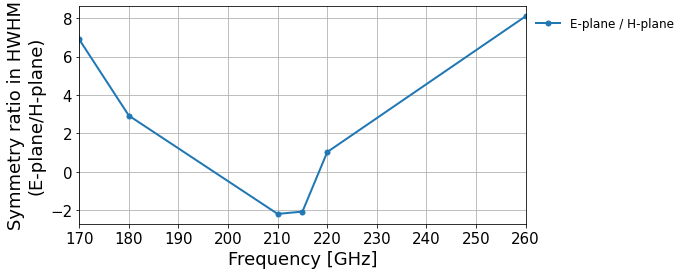

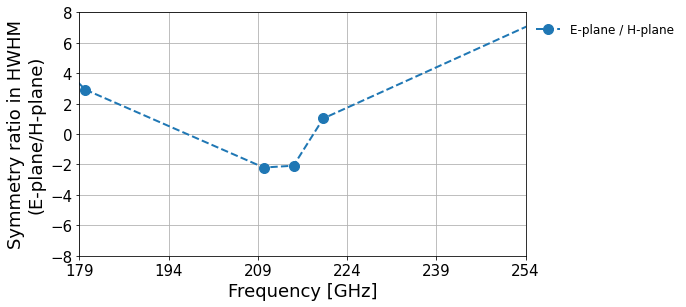

In [114]:
# Plot E-plane / H-plane
def plotHWHMsymmetric(data_list = dataHWHM_list, xlim=[170, 260], ylim=None, xticks=None, figsize=(8, 4), ls='-', markersize=5, save=False):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    dataE = data_list[2]
    dataH = data_list[0]
    ax.plot(dataE['x'], dataE['y']/dataH['y']*100-100, label='E-plane / H-plane', 
            marker='o', markersize=markersize, ls=ls, lw=2)
    ax.grid(True)
    ax.set_xlabel('Frequency [GHz]')
    ax.set_ylabel('Symmetry ratio in HWHM\n(E-plane/H-plane)')
    ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, ncol=1)
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    if xticks is not None: ax.set_xticks(xticks)
    if save: fig.savefig(f'{outdir}/HWHMsymmetric.png', transparent=True)
    return 0

plotHWHMsymmetric()
plotHWHMsymmetric(xlim=[179, 254], ylim=[-8, 8], figsize=(8, 4.48), xticks=np.linspace(179, 254, 6), markersize=10, ls='--', save=True)